# Analysis of the effects of Covid19 on Heritage organisations

This notebook analyses the results of the effects of Covid19 on Heritage organisations.
This was available at https://historicengland.org.uk/coronavirus/heritage-sector/survey/

In [309]:
import pandas as pd
import numpy
import matplotlib as plt
from pylab import *
from plotnine import * 
from datetime import datetime


Read in csv, note commas were removed from source excel file to turn it into a csv

In [310]:
df=pd.read_csv("Covid_19_heritage.csv")

List the variables in the dataset

In [311]:
list(df)

['Did you respond to\xa0the sector survey on the National Lottery Heritage Fund website?:Response',
 'Organisation Type:Response',
 'What is the approximate number of paid employees (full time equivalent) at your business/organisation?:Response',
 'What is the approximate number of volunteers working with your business/organisation?:Response',
 'Area:Archaeology',
 'Area:Archives',
 'Area:Community heritage',
 'Area:Conservation Architecture/Project Management',
 'Area:Gardens and Landscapes',
 'Area:Historic buildings (including industrial heritage sites)',
 'Area:Intangible (e.g. cultural traditions people’s memories dialects)',
 'Area:Maritime and transport heritage',
 'Area:Places of worship',
 'Area:Planning',
 'Area:Public parks',
 'Area:My organisation does not work in or represent any heritage areas',
 'Area:Other',
 'Geography:All English regions',
 'Geography:East Midlands',
 'Geography:West Midlands',
 'Geography:East of England',
 'Geography:London',
 'Geography:South East 

Relabelling some of the terms that repeat in the column names and columns to make it easier to read

In [312]:
df.columns = df.columns.map(lambda col: col.replace('Area:', ''))

df.columns = df.columns.map(lambda col: col.replace('Geography:', ''))

df.columns = df.columns.map(lambda col: col.replace('Effects:', ''))

df.columns = df.columns.map(lambda col: col.replace('Measures expected:', ''))

df= df.replace({'Area:':''}, regex=True)
df=df.replace({'Effects:':''}, regex=True)
df=df.replace({'Geography:':''}, regex=True)
df=df.replace({'Measures expected:':''}, regex=True)



Sample size

In [313]:
sample_size=df.shape[0]

# 1. Survey respondent characteristics

Heritage areas respondents covered

In [314]:
Areas=['Archaeology',
 'Archives',
 'Community heritage',
 'Conservation Architecture/Project Management',
 'Gardens and Landscapes',
 'Historic buildings (including industrial heritage sites)',
 'Intangible (e.g. cultural traditions people’s memories dialects)',
 'Maritime and transport heritage',
 'Places of worship',
 'Planning',
 'Public parks',
 'My organisation does not work in or represent any heritage areas',
 'Other']

heritage_area=df[Areas].count().reset_index(name='count').sort_values(['count'], ascending=False).reset_index(drop=True) 
#heritage_area=heritage_area.columns.map(lambda col: col.replace('index', 'Heritage area'))
heritage_area['% of respondents']=(heritage_area['count']/sample_size).round(2)*100
heritage_area

,index,count,% of respondents
0,Historic buildings (including industrial herit...,552,69.0
1,Places of worship,379,47.0
2,Conservation Architecture/Project Management,313,39.0
3,Community heritage,310,39.0
4,Archaeology,275,34.0
5,Planning,214,27.0
6,Archives,195,24.0
7,Gardens and Landscapes,186,23.0
8,Intangible (e.g. cultural traditions people’s ...,143,18.0
9,Public parks,107,13.0


Regional areas

In [315]:
Regional_areas=[
 'All English regions',
 'East Midlands',
  'West Midlands',
 'East of England',
 'London',
 'South East of England',
 'South West of England',
 'North East of England',
 'North West of England']


#Regional counts
Regions=df[Regional_areas].count().reset_index(name='count').sort_values(['count'], ascending=False).reset_index(drop=True)
Regions.columns = Regions.columns.map(lambda col: col.replace('index', 'Geographical region'))
Regions['% of respondents']=(Regions['count']/sample_size).round(2)*100
Regions

,Geographical region,count,% of respondents
0,All English regions,194,24.0
1,South West of England,121,15.0
2,East of England,116,14.0
3,South East of England,104,13.0
4,London,95,12.0
5,West Midlands,89,11.0
6,North West of England,79,10.0
7,East Midlands,73,9.0
8,North East of England,50,6.0


# 2. Counts the effects of Covid

In [316]:
Effects=['Loss or postponement of work',
 'Business-critical staff absence',
 'Lack of available volunteers',
 'Postponement/cancellation of planned income-generating or marketing events',
 'Reduced opening/business hours',
 'Supply chain problems',
 'Increased overheads',
 'Reduced visitor numbers',
 'Have had to furlough staff',
 'Have had to lay staff off',
 'Additional costs e.g.  investment in IT/home working',
 'Delayed payment by debtors']

covid19_effects=df[Effects].count().reset_index(name='count').sort_values(['count'], ascending=False).reset_index(drop=True) 
covid19_effects.columns = covid19_effects.columns.map(lambda col: col.replace('index', 'Covid 19 effects'))
covid19_effects['% of respondents']=(covid19_effects['count']/sample_size).round(2)*100
covid19_effects

,Covid 19 effects,count,% of respondents
0,Loss or postponement of work,618,77.0
1,Postponement/cancellation of planned income-ge...,472,59.0
2,Reduced opening/business hours,348,43.0
3,Have had to furlough staff,311,39.0
4,Reduced visitor numbers,277,34.0
5,Additional costs e.g. investment in IT/home w...,249,31.0
6,Lack of available volunteers,216,27.0
7,Delayed payment by debtors,196,24.0
8,Supply chain problems,179,22.0
9,Business-critical staff absence,135,17.0


Looks at the coocurrence of different issues  (should be reformatted and replaced with single function)

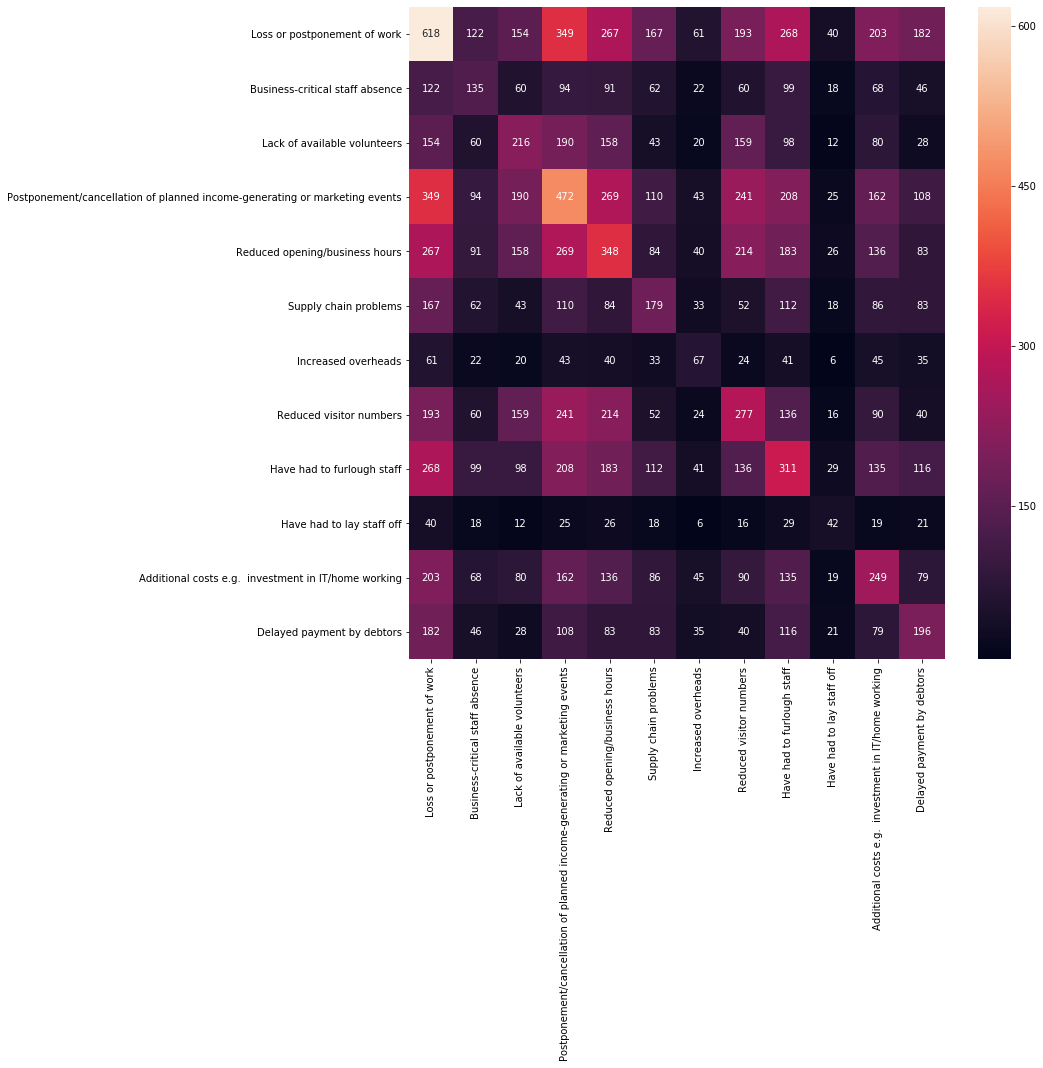

In [340]:
#switches to binary
effects=pd.get_dummies(df[Effects])
#Relabels the columns
effects.columns =Effects

l = len(effects.columns)
#Create an empty results matrix
results = np.zeros((l,l))
#Converts the binary variables into true and false

for i, ac in enumerate(effects):
    for j, bc in enumerate(effects):
           # sums the variables when both column values are true for a given row
           if i==j:
             results[j,i] = (effects[bc]).sum()
           else:
             results[j,i] = (effects[ac] & effects[bc]).sum()
#Converts the results into a dataframe
results = pd.DataFrame(results,index=effects.columns,columns=effects.columns)


fig, ax = plt.subplots(figsize=(12,12))  
#Does the heat map in seaborn
sns.heatmap(results, annot=True, ax=ax,fmt='g' )

# 3. Counts the Covid mitigation measures organisations are expecting to engage with

In [256]:
Measures=['Coronavirus Job Retention Scheme',
 'Deferring VAT and Self-Assessment payments',
 'Self-employment Income Support Scheme',
 'Statutory Sick Pay relief package for small and medium sized businesses (SMEs)',
 '12-month business rates holiday for all retail hospitality leisure and nursery businesses in England',
 'Small business grant funding of £10000 for all business in receipt of small business rate relief or rural rate relief',
 'Grant funding of £25000 for retail hospitality and leisure businesses with property with a rateable value between £15000 and £51000',
 'Coronavirus Business Interruption Loan Scheme offering loans of up to £5 million for SMEs through the British Business Bank',
 'Lending facility from the Bank of England to help support liquidity among larger firms helping them bridge coronavirus disruption to their cash flows through loans',
 'HMRC Time To Pay Scheme',
 'Awaiting further clarification of the Government support']

Measures_expected=df[Measures].count().reset_index(name='count').sort_values(['count'], ascending=False).reset_index(drop=True).reset_index(drop=True)
Measures_expected.columns = Measures_expected.columns.map(lambda col: col.replace('index', 'Expected Measures taken'))
Measures_expected['% of respondents']=(Measures_expected['count']/sample_size).round(2)*100
Measures_expected

,Expected Measures taken,count,% of respondents
0,Awaiting further clarification of the Governme...,427,53.0
1,Coronavirus Job Retention Scheme,313,39.0
2,Deferring VAT and Self-Assessment payments,234,29.0
3,Self-employment Income Support Scheme,121,15.0
4,HMRC Time To Pay Scheme,114,14.0
5,Small business grant funding of £10000 for all...,112,14.0
6,Statutory Sick Pay relief package for small an...,86,11.0
7,12-month business rates holiday for all retail...,67,8.0
8,Coronavirus Business Interruption Loan Scheme ...,53,7.0
9,Grant funding of £25000 for retail hospitality...,37,5.0


Looks at the coocurrence of different schemes (should be reformatted and replaced with single function)

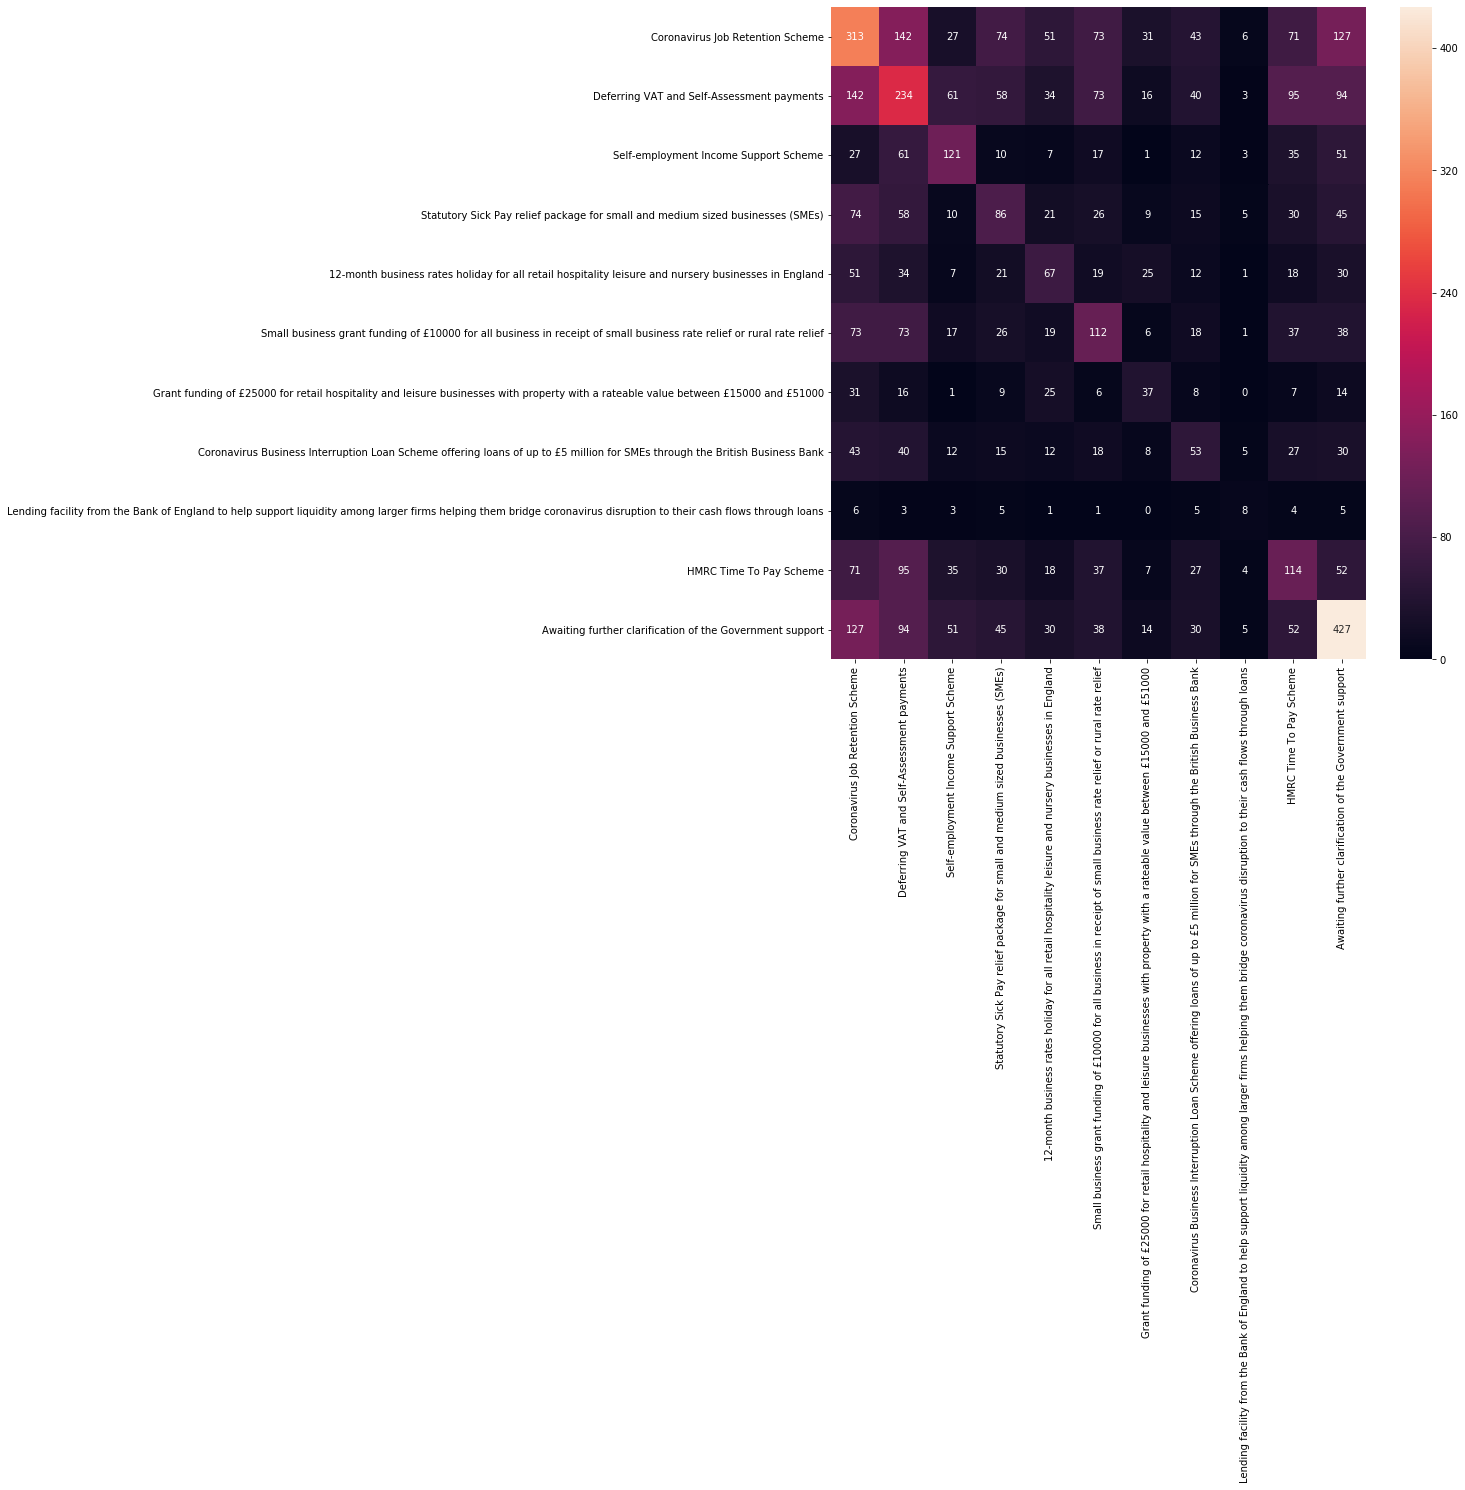

In [341]:

#switches to binary
gov_measures=pd.get_dummies(df[Measures])
#Relabels the columns
gov_measures.columns=Measures

l = len(gov_measures.columns)
#Create an empty results matrix
results = np.zeros((l,l))
#Converts the binary variables into true and false
for i, ac in enumerate(gov_measures):
    for j, bc in enumerate(gov_measures):
           # sums the variables when both column values are true for a given row
           if i==j:
             results[j,i] = (gov_measures[bc]).sum()
           else:
             results[j,i] = (gov_measures[ac] & gov_measures[bc]).sum()
#Converts the results into a dataframe
results = pd.DataFrame(results,index=gov_measures.columns,columns=gov_measures.columns)

fig, ax = plt.subplots(figsize=(12,12))  
sns.heatmap(results, annot=True,ax=ax, fmt='g')